Mean Squared Error (MSE): 38.364821336274815
Root Mean Squared Error (RMSE): 6.1939342373224155
Mean Absolute Error (MAE): 4.888038990305309
R^2 Score: 0.5624357135354872


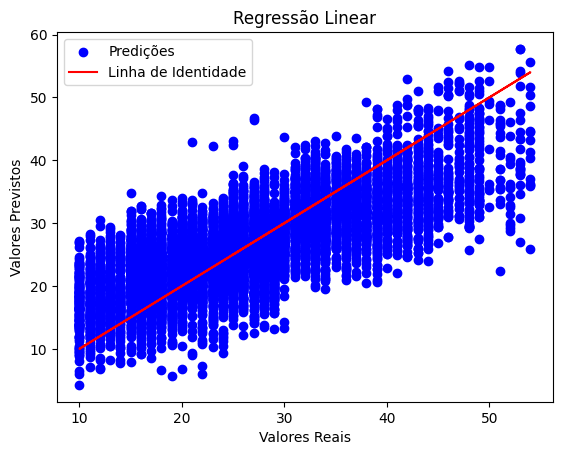

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data['Time_taken(min)'] = train_data['Time_taken(min)'].str.extract('(\d+)').astype(float)
train_data['Delivery_person_Age'] = pd.to_numeric(train_data['Delivery_person_Age'], errors='coerce')
train_data['Delivery_person_Ratings'] = pd.to_numeric(train_data['Delivery_person_Ratings'], errors='coerce')
train_data['multiple_deliveries'] = pd.to_numeric(train_data['multiple_deliveries'], errors='coerce')

train_data['Order_Date'] = pd.to_datetime(train_data['Order_Date'], dayfirst=True, errors='coerce')
train_data['Order_DayOfWeek'] = train_data['Order_Date'].dt.dayofweek
train_data['Order_Month'] = train_data['Order_Date'].dt.month

time_format = "%H:%M:%S"
train_data['Time_Orderd'] = pd.to_datetime(train_data['Time_Orderd'], format=time_format, errors='coerce')
train_data['Time_Order_picked'] = pd.to_datetime(train_data['Time_Order_picked'], format=time_format, errors='coerce')
train_data['Time_to_pickup'] = (train_data['Time_Order_picked'] - train_data['Time_Orderd']).dt.total_seconds() / 60

categorical_cols = ['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

imputer = SimpleImputer(strategy='mean')
X = train_data.drop(columns=['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Time_taken(min)'])
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y = train_data['Time_taken(min)']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

plt.scatter(y_val, y_pred, color='blue', label='Predições')
plt.plot(y_val, y_val, color='red', label='Linha de Identidade')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão Linear')
plt.legend()
plt.show()